## Problem Statement
Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

##### Understanding and defining churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

##### Definitions of churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

###### Usage-based churn: 
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the usage-based definition to define churn.

##### High-value churn
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

#### Understanding the business objective and the data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#### Understanding customer behaviour during churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :
The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.



### Goals of the Case Study
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

You can take the following suggestive steps to build the model:

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

Derive new features.

Reduce the number of variables using PCA.

Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

Finally, choose a model based on some evaluation metric.

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

Finally, recommend strategies to manage customer churn based on your observations.


## Will Follows these step to build multiple linear regression model
    Step 1- Import all Required packages
    Step 2- Data Loading / Understanding / Data Cleansing and Exploratory Data Analysis
    Step 3- Filter high Value Customer
    Step 4- Derive new features
    Step 5- Data Prepration for Modeling ( train-test split and rescaling )
    Step 6- Handle Class Imbalance
    Step 7- Model building using PCA and without PCA
    Step 8- Model Evaluation
    Step 9- Prediction on the test data and select the best Model
    Step 10- Identifying important predictors and summarize
        

## Step 1- Import all Required packages

In [1]:
# Importing required Libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd,numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from datetime import date,datetime
from IPython.display import Image  
from six import StringIO  
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import multiprocessing
import sklearn.metrics as metrics
import statsmodels.api as sm
logreg = LogisticRegression()


## Step 2- Data Loading / Understanding / Data Cleansing and Exploratory Data Analysis

In [2]:
# Importing the data

churn_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Seting up the limit to visible all columns and rows for better visibilites

pd.options.display.max_rows = 300
pd.options.display.max_columns = 200

In [4]:
# checkig data load

churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

In [5]:
# Checking the shape of the data 

churn_data.shape

(99999, 226)

In [6]:
# Checking dtype

churn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
# Checking Null values %
(churn_data.isnull().sum()/len(churn_data)*100).sort_values(ascending = False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

In [8]:
# Arranging all columns according to their data type

# Getting all ID column

id_col = ['mobile_number', 'circle_id']
print('ID Columns >>>>>  ',id_col)

print('---------------------------------------------------------------------------------------')
# Getting all Date column

date_col=[]
for col in list(churn_data.columns):
    if ('date_of' in col):
        date_col.append(col)
print('Date Columns >>>>>  ',date_col)

print('---------------------------------------------------------------------------------------')
# Getting all Categorical column

cat_col=[]
for col in list(churn_data.columns):
    if ('user' in col):
        cat_col.append(col)
print('Categorical Columns >>>>>  ',cat_col)

print('--------------------------------------------------------------------------------------')
# Getting all other numerical column

num_col = churn_data.columns.difference(id_col + date_col + cat_col)

print('Numerical Columns >>>>>  ',num_col)


ID Columns >>>>>   ['mobile_number', 'circle_id']
---------------------------------------------------------------------------------------
Date Columns >>>>>   ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
---------------------------------------------------------------------------------------
Categorical Columns >>>>>   ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
--------------------------------------------------------------------------------------
Numerical Columns >>>>>   Index(['aon', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_6',
       ...
       'total_rech_num_8', 'tota

In [9]:
# Putting -1 as new category where in user columns have null value.

for column in cat_col:
    churn_data[column] = churn_data[column].fillna(-1)

In [10]:
# Putting 0 where in all numeric columns which have null. assuming they have not done recharge hence value is zero

for column in num_col:
    churn_data[column] = churn_data[column].fillna(0)

In [11]:
# Droping the 'Date' columns as it is not required for Analysis

churn_data.drop(date_col, axis = 1, inplace = True)

In [12]:
# Droping the 'ID' columns as it is not required for Analysis

churn_data.drop(id_col, axis = 1, inplace = True)

In [13]:
# finding columns with only 1 unique value

unique_val_col = churn_data.columns[churn_data.nunique() == 1]


In [14]:
# Dropping columns with only 1 unique value

churn_data.drop(columns=unique_val_col)

# Checking data size after drop

churn_data.shape

(99999, 212)

In [15]:
# Checking Null values after missing value treatment

(churn_data.isnull().sum()/len(churn_data)*100).sort_values(ascending = False)

loc_og_t2o_mou        0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
total_rech_num_9      0.0
total_rech_num_7      0.0
std_og_t2o_mou        0.0
total_rech_num_6      0.0
std_ic_t2o_mou_7      0.0
std_ic_t2o_mou_8      0.0
std_ic_t2o_mou_9      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou

#### Step 3- Derive new features

In [16]:
# Creating the total mou instead of offnet and onnet

churn_data['total_mou_6'] = churn_data['onnet_mou_6'] + churn_data['offnet_mou_6']
churn_data['total_mou_7'] = churn_data['onnet_mou_7'] + churn_data['offnet_mou_7']
churn_data['total_mou_8'] = churn_data['onnet_mou_8'] + churn_data['offnet_mou_8']

In [17]:
# Droping the mou onnet and offnet columns

churn_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)


## Step 4- Filter high Value Customer

    - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [18]:
# Adding new variable of total recharge amount for data

churn_data['total_june_data_rech'] = churn_data.total_rech_data_6 * churn_data.av_rech_amt_data_6
churn_data['total_jul_data_rech'] = churn_data.total_rech_data_7 * churn_data.av_rech_amt_data_7

In [19]:
# calculating the total recharge amount for June and July and adding into new variable

churn_data['jun_data_amt'] = churn_data.total_rech_amt_6 + churn_data.total_june_data_rech
churn_data['jul_data_amt'] = churn_data.total_rech_amt_7 + churn_data.total_jul_data_rech

In [20]:
# calculating avg recharge of the customer for jun and jul

churn_data['avg_amt_data_jun_jul'] = (churn_data.jun_data_amt + churn_data.jul_data_amt)/2

In [21]:
# finding 70% of the avg recharge

x = churn_data['avg_amt_data_jun_jul'].quantile(0.70)

print(" 70th percentile of the avg recharge amount in the first two months: ", x, "\n")


 70th percentile of the avg recharge amount in the first two months:  478.0 



In [22]:
# finding above 70% value customers

churn_data = churn_data[churn_data['avg_amt_data_jun_jul'] > x]


In [23]:
# droping all the new variable created for filter hihg value customer

churn_data = churn_data.drop(['total_june_data_rech', 'total_jul_data_rech','jun_data_amt', 'jul_data_amt', 'avg_amt_data_jun_jul'], axis=1)

In [24]:
churn_data.shape

(29953, 209)

#### 3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [25]:
# Updating 0 as not churn and 1 as churn

churn_data['churn'] = churn_data.apply(lambda row: 1 if (row.total_ic_mou_9 == 0 and row.total_og_mou_9 == 0 and row.vol_2g_mb_9 == 0 and row.vol_3g_mb_9 == 0) else 0, axis=1)

In [26]:
# Checking churn %

churn_data['churn'].value_counts() / len(churn_data) * 100

0    91.877274
1     8.122726
Name: churn, dtype: float64

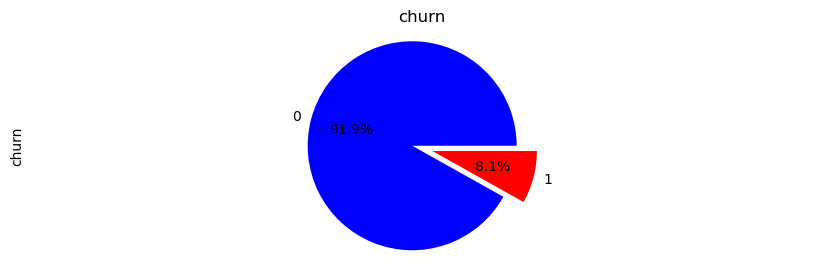

In [27]:
# Analyzing churn Column by ploting Pie Chart

plt.figure(figsize = [10,3])
colors = ['b', 'red']
explode = [0, 0.2]
churn_data.churn.value_counts().plot.pie(title = 'churn',explode = explode,colors = colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [28]:
# Getting all churn phase column having _9 to drop

var_end_with9=[]
for col in list(churn_data.columns):
    if ('_9' in col):
        var_end_with9.append(col)
var_end_with9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [29]:
# Dropping the churn phase columns

churn_data.drop(var_end_with9, axis=1, inplace=True)


In [30]:
# checking data shape

churn_data.shape

(29953, 159)

In [31]:
# Arranging all columns according to their data type

# Getting all categorical column

cat_col=[]
for col in list(churn_data.columns):
    if ('user' in col):
        cat_col.append(col)
print('Categorical Columns >>>>>  ',cat_col)

print('--------------------------------------------------------------------------------------')
# Getting all other numerical column

num_col = churn_data.columns.difference(cat_col)

print('Numerical Columns >>>>>  ',num_col)
print('--------------------------------------------------------------------------------------')


Categorical Columns >>>>>   ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
--------------------------------------------------------------------------------------
Numerical Columns >>>>>   Index(['aon', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'total_rech_data_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'],
      dtype='object', length=153)
--------------------------------------------------------------------------------------


#### Output for Missing Values and Data set
    1 Total data have 99999 rows and 226 columns
    2 Out of that total 166 columns found with null value and out of that 40 columns have 70% and above null value
    3 Replaced categorical columns with new category as -1 as all of them are important features
    4 Replaced 0 to all numerical columns assuming they have not done recharge
    5 Droped ID coloumns as it was not required for prediction
    6 Droped Date columns as it was not required for prediction
    7 Droped coulomns which was having one unique value
    8 After Cleaning 99999 rows and 212 columns left
    9 Filtered high value customer after that 29953 rows and 212 columns left
    10 updated 0 and 1 for churn status and find 91.9% have not churne and 8.1% have churned
    11 Droped all columns which was having '_9'
    12 After performing all cleaning activity we have get 29953 rows and 162 columns
    

### EDA
    Univariate Analysis

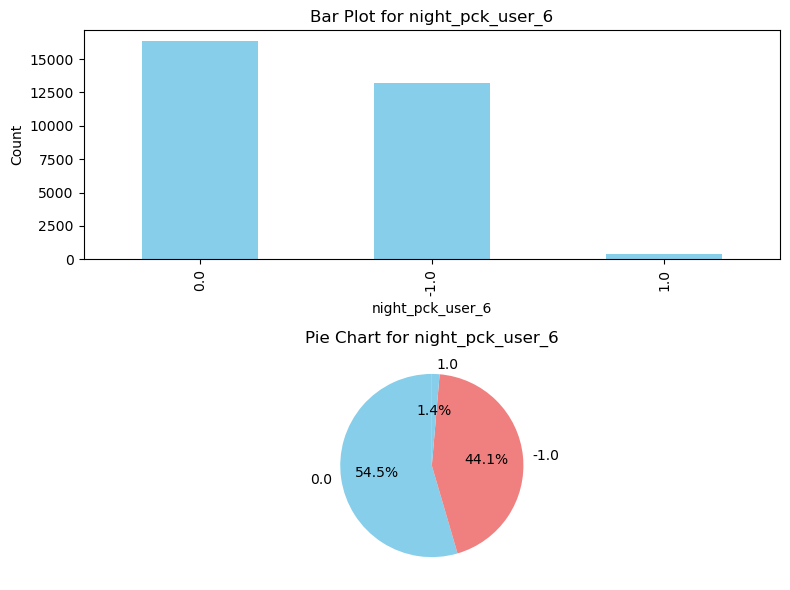

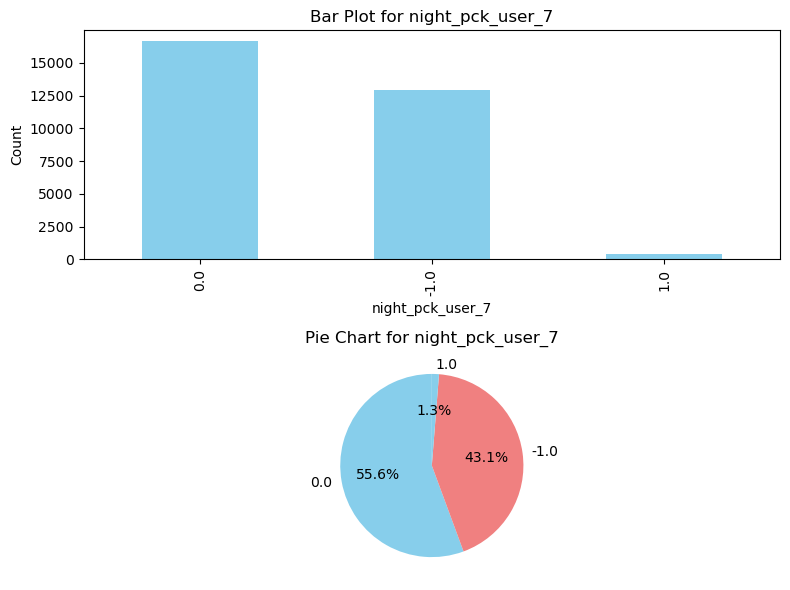

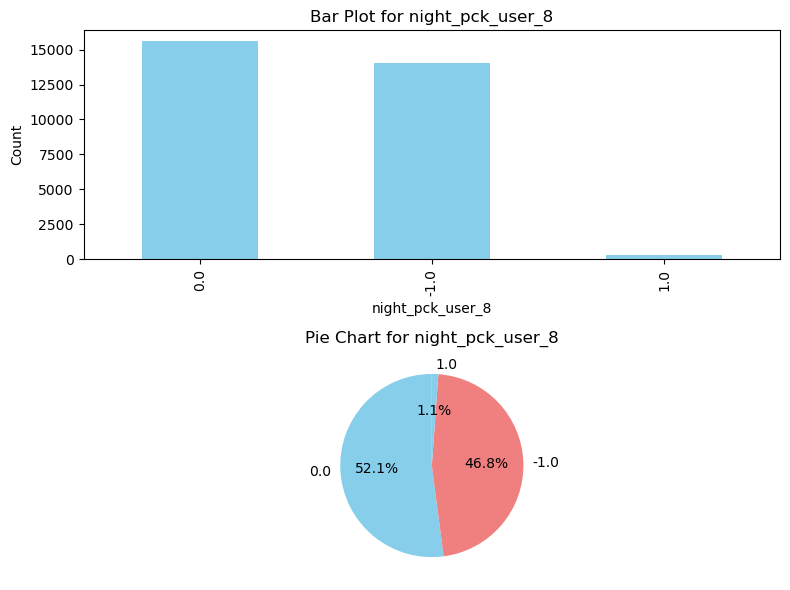

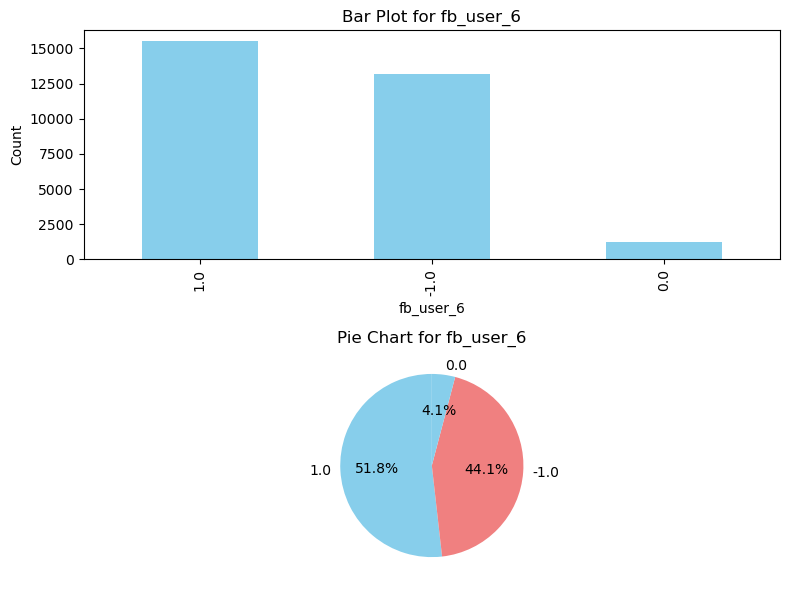

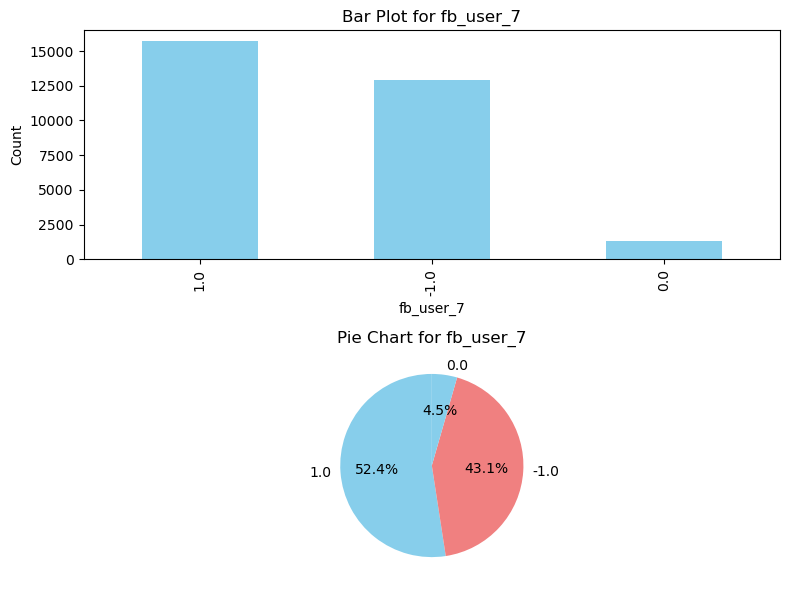

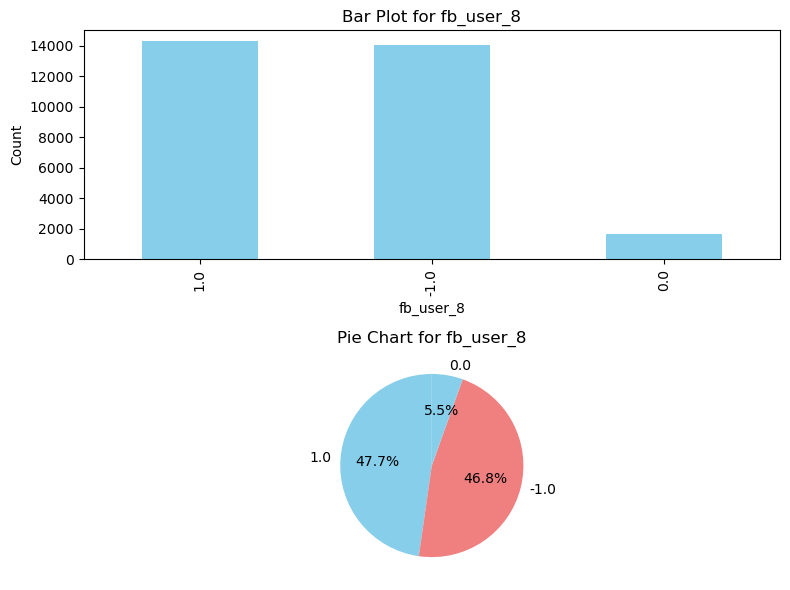

In [32]:
# Loop through categorical columns and ploting bar charts

for col in cat_col:
    plt.figure(figsize=(8, 6))
    
    # Bar Plot
    plt.subplot(2, 1, 1)
    churn_data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Pie Chart
    plt.subplot(2, 1, 2)
    churn_data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    plt.title(f'Pie Chart for {col}')
    plt.xlabel('')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()


#### Bivariate Analysis

In [33]:
# Making Bucket of the aon column

churn_data["tenure"] = pd.cut((churn_data["aon"]/30), bins=[0,6,12,24,36,48,60,61], labels=["0-6M","6-12M","1-2Y","2-3Y","3-4Y","4-5Y","5Y+"])
churn_data.drop('aon',axis=1, inplace=True)

In [34]:
# checking value count of tenure

churn_data["tenure"].value_counts()

1-2Y     7940
6-12M    5133
2-3Y     4613
3-4Y     3038
4-5Y     1911
5Y+       139
0-6M       15
Name: tenure, dtype: int64

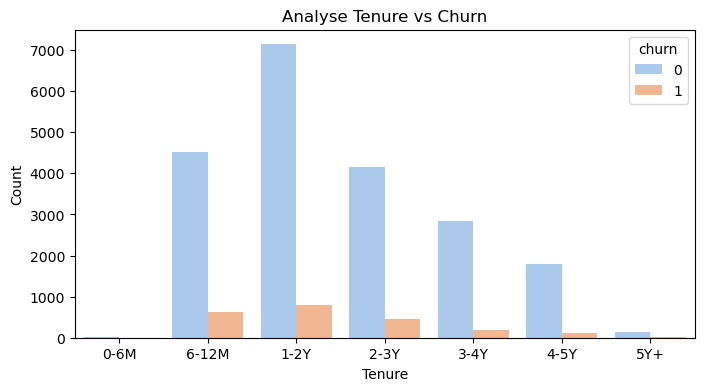

In [35]:
# Ploting bar plot

plt.figure(figsize=(8, 4))
sns.countplot(x='tenure', hue='churn', data=churn_data, palette='pastel')
plt.title('Analyse Tenure vs Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()


In [36]:
# Checking corr for droping high correlated above 90%
data_corr = churn_data.corr()
data_corr.loc[:,:] = np.tril(data_corr, k=-1)
data_corr = data_corr.stack()
data_corr
data_corr[(data_corr > 0.80) | (data_corr < -0.80)].sort_values(ascending=False)

total_mou_7         total_og_mou_7        0.990941
total_mou_8         total_og_mou_8        0.988833
sachet_2g_8         count_rech_2g_8       0.987175
sachet_2g_7         count_rech_2g_7       0.986423
total_mou_6         total_og_mou_6        0.985833
sachet_2g_6         count_rech_2g_6       0.984939
fb_user_6           night_pck_user_6      0.956578
fb_user_7           night_pck_user_7      0.956280
total_rech_amt_8    arpu_8                0.955322
fb_user_8           night_pck_user_8      0.954790
total_rech_amt_6    arpu_6                0.946104
total_rech_amt_7    arpu_7                0.943571
isd_og_mou_8        isd_og_mou_7          0.943120
arpu_2g_6           arpu_3g_6             0.940080
arpu_2g_8           arpu_3g_8             0.937734
arpu_2g_7           arpu_3g_7             0.936434
isd_og_mou_8        isd_og_mou_6          0.918187
isd_og_mou_7        isd_og_mou_6          0.915247
count_rech_2g_6     total_rech_data_6     0.911366
count_rech_2g_7     total_rech_

In [37]:
# Assigning all above 90% corr column to drop

high_corr = ['sachet_2g_8','sachet_2g_7','sachet_2g_6','fb_user_6','fb_user_7','total_rech_amt_8','fb_user_8','total_rech_amt_6','total_rech_amt_7','isd_og_mou_8','arpu_2g_6','arpu_2g_8','arpu_2g_7','isd_og_mou_8','isd_og_mou_7','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','sachet_2g_7','sachet_2g_6','sachet_2g_8']

In [38]:
# Droping above 90% corr variable

churn_data.drop(high_corr,axis=1, inplace=True)

In [39]:
# Checking data size

churn_data.shape

(29953, 142)

In [40]:
# finding the rech columns for bin creation
rech_col=[]
for col in list(churn_data.columns):
    if ('rech_amt' in col):
        rech_col.append(col)
print('rech_cols >>>>>  ',rech_col)

rech_cols >>>>>   ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']


In [41]:

# Creating buckets for all max amt rech columns

max_rech_amt = ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']

# Maximum value for bins
max_value = 4000

# Define bins
bins = [0, 100, 300, 500, 1000, 1001]

# Labels for bins
labels = ['0-100', '101-300', '301-500', '501-1000', '1001+']

# Appling cut for each column
for col in max_rech_amt:
    churn_data[f'{col}_bins'] = pd.cut(churn_data[col], bins=bins, labels=labels, include_lowest=True)


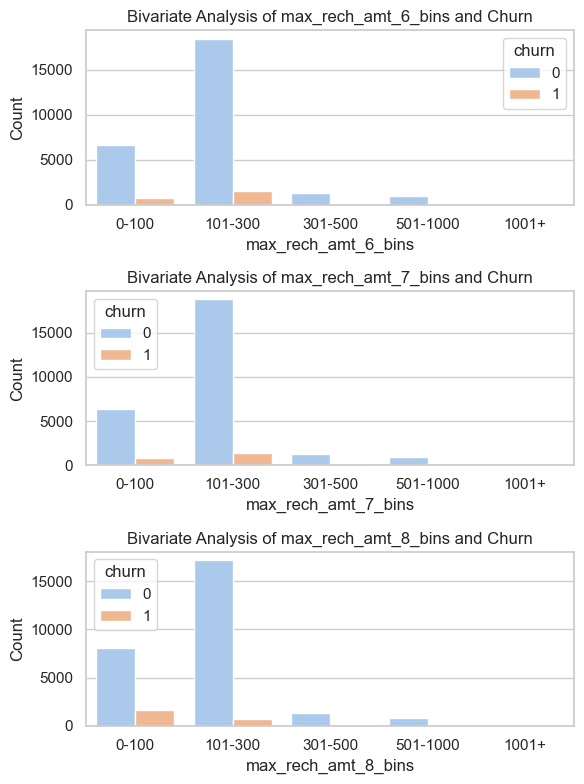

In [42]:
# creating chart for analysing the data

sns.set(style="whitegrid")

plt.figure(figsize=(6, 8))
for i, col in enumerate([f'{col}_bins' for col in max_rech_amt], 1):
    plt.subplot(3, 1, i)
    sns.countplot(x=col, hue='churn', data=churn_data, palette='pastel')
    plt.title(f'Bivariate Analysis of {col} and Churn')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [43]:

# Creating buckets for all amt_data rech columns

av_rech_amt = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

# Maximum value for bins
max_value = 4000

# Define bins
bins = [0, 100, 300, 500, 1000, 1001]

# Labels for bins
labels = ['0-100', '101-300', '301-500', '501-1000', '1001+']

# Apply cut for each column
for col in av_rech_amt:
    churn_data[f'{col}_bins'] = pd.cut(churn_data[col], bins=bins, labels=labels, include_lowest=True)


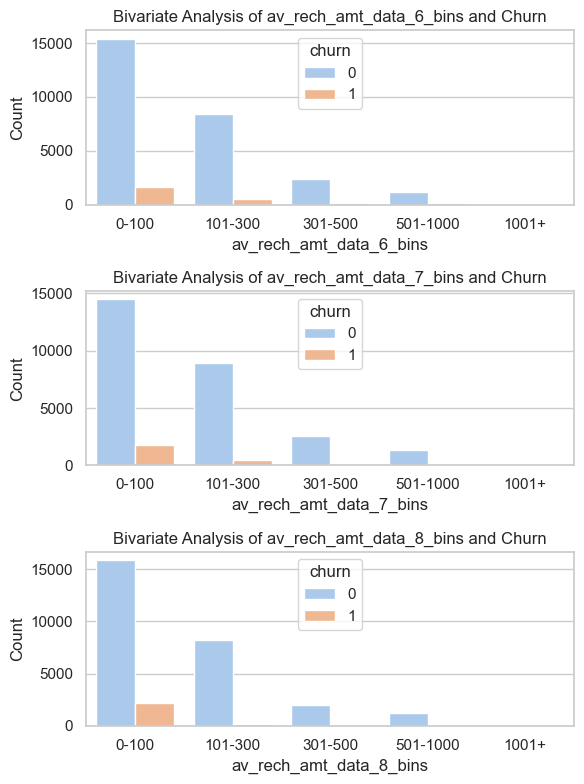

In [44]:
# Creating chart for analysis

sns.set(style="whitegrid")

# Create a grouped bar plot for each 'max_rech_amt_bins' column against 'churn'
plt.figure(figsize=(6, 8))
for i, col in enumerate([f'{col}_bins' for col in av_rech_amt], 1):
    plt.subplot(3, 1, i)
    sns.countplot(x=col, hue='churn', data=churn_data, palette='pastel')
    plt.title(f'Bivariate Analysis of {col} and Churn')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [45]:
#  fetching all bin columns for drop as it is not required now 
bin_col=[]
for col in list(churn_data.columns):
    if ('bin' in col):
        bin_col.append(col)
print('bin_cols >>>>>  ',bin_col)

bin_cols >>>>>   ['max_rech_amt_6_bins', 'max_rech_amt_7_bins', 'max_rech_amt_8_bins', 'av_rech_amt_data_6_bins', 'av_rech_amt_data_7_bins', 'av_rech_amt_data_8_bins']


In [46]:
# Droping all bin columns
churn_data.drop(bin_col,axis=1, inplace=True)

### Multivariate Analysis

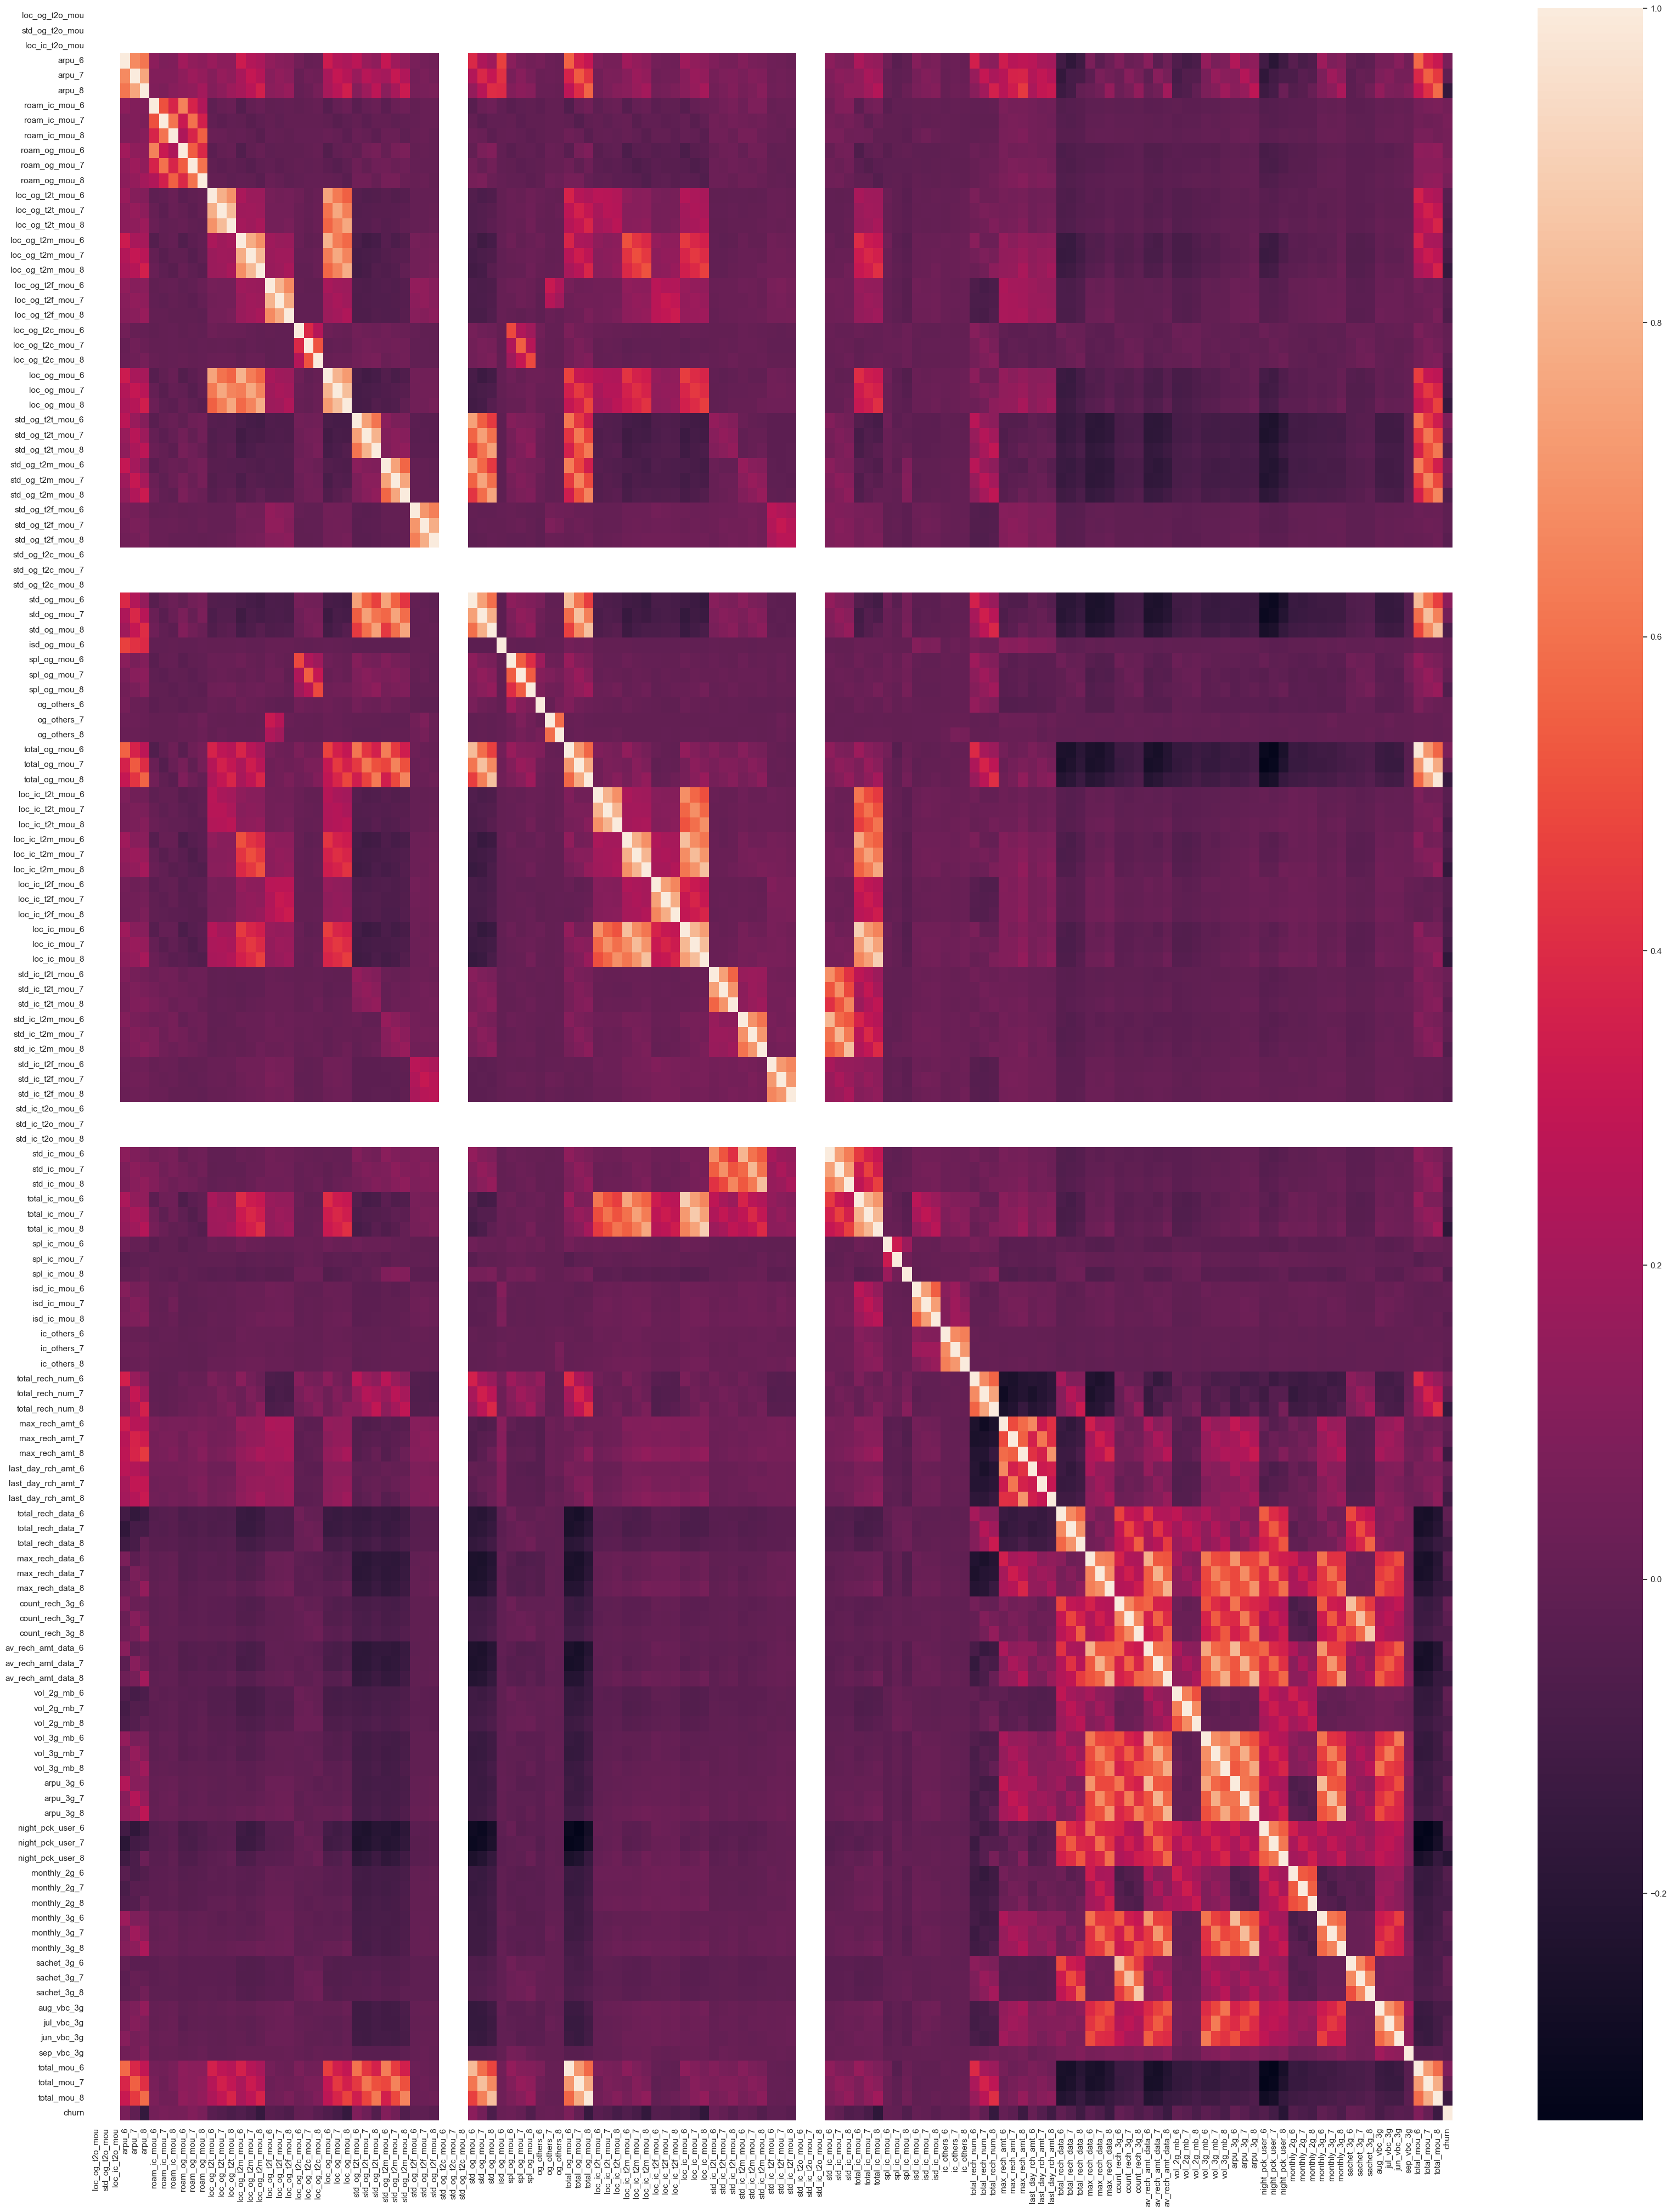

In [47]:
# Ploting heatmap for checking corr

plt.figure(figsize = (40, 50))
sns.heatmap(churn_data.corr())
plt.show()

In [48]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(churn_data[['tenure']], drop_first=True)
# Adding the results to the master dataframe
churn_data = pd.concat([churn_data, dummy], axis=1)


In [49]:
# Droping tenure columns
churn_data.drop('tenure',axis=1, inplace=True)

In [50]:
# Converting data type

churn_data['tenure_1-2Y']= churn_data['tenure_1-2Y'].astype(np.float64)
churn_data['tenure_2-3Y']=churn_data['tenure_2-3Y'].astype(np.float64)
churn_data['tenure_3-4Y']=churn_data['tenure_3-4Y'].astype(np.float64)
churn_data['tenure_4-5Y']=churn_data['tenure_4-5Y'].astype(np.float64)
churn_data['tenure_5Y+']=churn_data['tenure_5Y+'].astype(np.float64)
churn_data['tenure_6-12M']=churn_data['tenure_6-12M'].astype(np.float64)


## Step 5- Data Prepration for Modeling ( train-test split and rescaling )

In [51]:
# Putting feature variable to X
X = churn_data.drop(['churn'], axis=1)


In [52]:
# Putting response variable to y
y = churn_data['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [53]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)


In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22464, 146), (7489, 146), (22464,), (7489,))

### Step 6- Handle Class Imbalance

In [55]:
# Using SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train,y_train)

In [56]:
X_train.shape

(41234, 146)

In [57]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

## Step 7- Model building using PCA and without PCA

### 1. Model building using PCA

In [58]:
# Instantiating PCA

pca = PCA(random_state=42)

In [59]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [60]:
# Checking components

pca.components_

array([[-1.63178879e-19, -2.22044605e-16, -0.00000000e+00, ...,
         3.41467672e-06,  9.93187427e-07, -3.18018824e-07],
       [ 4.30244842e-19, -4.44089210e-16, -8.23993651e-17, ...,
         1.95038091e-06,  4.06269306e-06,  7.07389073e-07],
       [ 6.12945156e-20, -1.80411242e-16, -3.46944695e-18, ...,
         3.28217471e-06,  7.90583682e-06,  1.09645719e-06],
       ...,
       [ 0.00000000e+00,  6.98969382e-03,  3.83506300e-02, ...,
        -5.34809827e-16, -4.26132111e-16,  4.77551246e-16],
       [-0.00000000e+00,  1.19081498e-02,  2.25205405e-02, ...,
         3.37159771e-16,  4.14236381e-16, -1.06358116e-16],
       [ 9.99999232e-01, -1.14775134e-03,  4.66307275e-04, ...,
         3.32320333e-15,  3.08431145e-15,  4.63146746e-15]])

In [61]:
# checking  variance ratios
pca.explained_variance_ratio_

array([3.55435334e-01, 1.54582888e-01, 1.01330750e-01, 7.55989397e-02,
       3.96018986e-02, 3.60541479e-02, 3.14912988e-02, 2.76004212e-02,
       2.46636101e-02, 1.96086933e-02, 1.67983363e-02, 1.35902875e-02,
       1.06309606e-02, 7.62235958e-03, 7.47033808e-03, 6.25363813e-03,
       6.00688744e-03, 5.29270958e-03, 5.02595282e-03, 4.73334913e-03,
       4.20972857e-03, 4.03214526e-03, 3.62551015e-03, 3.15695460e-03,
       3.07447165e-03, 2.96829147e-03, 2.57631037e-03, 2.49785469e-03,
       2.36100303e-03, 1.95706900e-03, 1.86456178e-03, 1.47955893e-03,
       1.38589845e-03, 1.21138774e-03, 1.11641633e-03, 1.04392360e-03,
       9.54605918e-04, 8.87578840e-04, 8.40078081e-04, 8.23623160e-04,
       7.82847462e-04, 6.86235271e-04, 6.15161899e-04, 6.01772558e-04,
       5.82823738e-04, 5.64775234e-04, 4.95334120e-04, 4.73313422e-04,
       3.87886357e-04, 3.82744350e-04, 3.00367002e-04, 2.73670968e-04,
       2.40635413e-04, 2.35621072e-04, 2.28539690e-04, 2.16461815e-04,
      

In [62]:
# Cumuliative varinace of the principal components.
var_cumu = np.round(np.cumsum(pca.explained_variance_ratio_)*100,decimals=4)
var_cumu

array([ 35.5435,  51.0018,  61.1349,  68.6948,  72.655 ,  76.2604,
        79.4095,  82.1696,  84.6359,  86.5968,  88.2766,  89.6357,
        90.6988,  91.461 ,  92.208 ,  92.8334,  93.4341,  93.9633,
        94.4659,  94.9393,  95.3603,  95.7635,  96.126 ,  96.4417,
        96.7492,  97.046 ,  97.3036,  97.5534,  97.7895,  97.9852,
        98.1717,  98.3196,  98.4582,  98.5794,  98.691 ,  98.7954,
        98.8908,  98.9796,  99.0636,  99.146 ,  99.2243,  99.2929,
        99.3544,  99.4146,  99.4729,  99.5293,  99.5789,  99.6262,
        99.665 ,  99.7033,  99.7333,  99.7607,  99.7847,  99.8083,
        99.8312,  99.8528,  99.8709,  99.8859,  99.9005,  99.9135,
        99.9258,  99.9379,  99.9486,  99.9561,  99.9629,  99.9694,
        99.9753,  99.9791,  99.9827,  99.9855,  99.9881,  99.9902,
        99.9913,  99.9924,  99.9933,  99.9942,  99.995 ,  99.9957,
        99.9963,  99.9968,  99.9974,  99.9978,  99.9982,  99.9985,
        99.9988,  99.999 ,  99.9992,  99.9994,  99.9995,  99.9

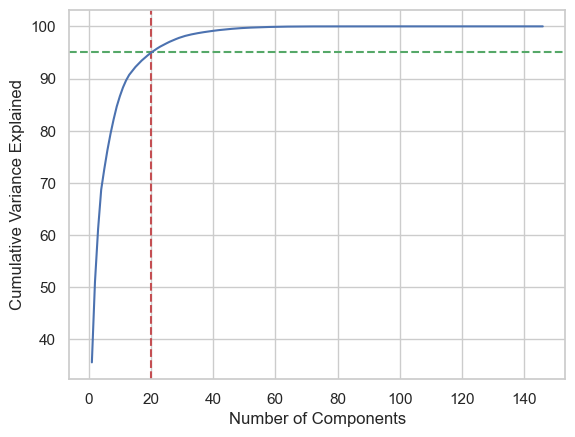

Num of components at 95% cumulative explained variance: 21


In [63]:
# Seting a threshold for cumulative explained variance (e.g., 95%)

cumulative_var_threshold = 95

# Finding the index where the cumulative explained variance exceeds the threshold
num_components_threshold = np.argmax(var_cumu >= cumulative_var_threshold)

# Making the scree plot
plt.axhline(y=cumulative_var_threshold, color='g', linestyle='--')
plt.axvline(x=num_components_threshold, color='r', linestyle='--')
plt.plot(range(1, len(var_cumu) + 1), var_cumu)
plt.xlabel('Number of Components')
plt.ylabel("Cumulative Variance Explained")
plt.show()

# Print the number of components at the threshold
print("Num of components at {}% cumulative explained variance: {}".format(cumulative_var_threshold, num_components_threshold + 1))


In [64]:
#Using incremental PCA for better efficiency

In [65]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components = 21)

X_train_pca = pca_final.fit_transform(X_train)

In [66]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (41234, 146)
Size of dataset after PCA is: (41234, 21)


In [67]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))


max positive corr: 0.023 , min negative corr:  -0.01


In [68]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(7489, 21)

### 1. Logistic regression with PCA

In [69]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [70]:
# default solver is very slow so changed to 'lbfgs'
logreg = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [71]:
# Training the model on the data
logreg.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [72]:
#prediction on test data
y_pred = logreg.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)


confusoin matrix 	
 [[5486 1417]
 [  94  492]]


In [73]:

#checking sesitivity 
print("sensitivity \t        ", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t        ", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

sensitivity 	         0.84
specificity 	         0.79
area under the curve 	 0.82


In [74]:
# Creating StratifiedKFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [75]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.343902,0.021992,0.009186,0.004871,0.01,{'C': 0.01},0.886203,0.891763,0.895481,0.889774,0.882520,0.889148,0.004471,5,0.890285,0.888651,0.888180,0.889036,0.891263,0.889483,0.001131
1,0.334775,0.014217,0.003065,0.002803,0.1,{'C': 0.1},0.886199,0.891764,0.895481,0.889767,0.882530,0.889149,0.004468,3,0.890282,0.888653,0.888182,0.889033,0.891274,0.889485,0.001134
2,0.332083,0.009466,0.005469,0.006837,1,{'C': 1},0.886200,0.891765,0.895482,0.889773,0.882516,0.889147,0.004473,6,0.890283,0.888652,0.888182,0.889035,0.891260,0.889482,0.001130
3,0.336022,0.023363,0.004876,0.002636,10,{'C': 10},0.886200,0.891764,0.895482,0.889775,0.882522,0.889149,0.004471,2,0.890282,0.888653,0.888183,0.889036,0.891265,0.889484,0.001131
4,0.348945,0.029133,0.004278,0.002284,100,{'C': 100},0.886200,0.891765,0.895481,0.889775,0.882532,0.889151,0.004468,1,0.890283,0.888653,0.888183,0.889036,0.891272,0.889485,0.001133
5,0.319428,0.018378,0.002792,0.002314,1000,{'C': 1000},0.886201,0.891765,0.895481,0.889775,0.882518,0.889148,0.004472,4,0.890283,0.888653,0.888183,0.889036,0.891262,0.889483,0.001130


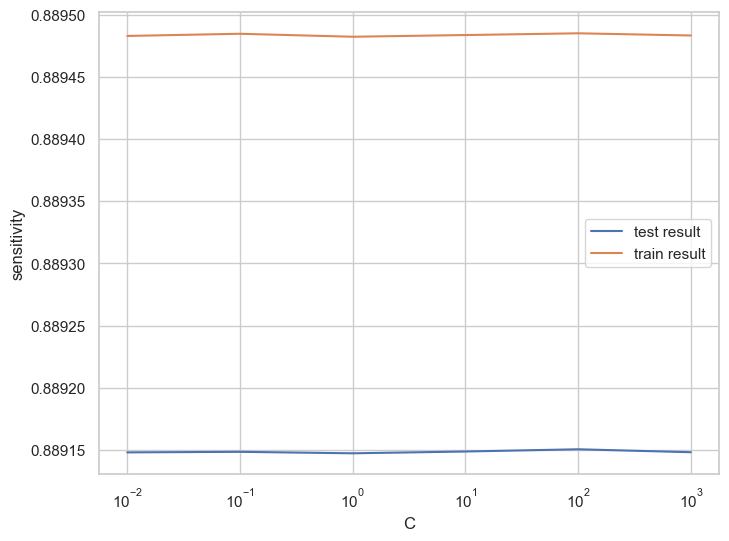

In [76]:
 # plotting C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [77]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8891505539959285 at C = 100


In [78]:
# Instantiating the model with the best C
logistic_pca = LogisticRegression(C=best_C)

# Fiting the model into the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [79]:
# Prediction on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [80]:
## Confusion Matrix.

actual = np.random.binomial(1,0.9,size = 100)
predicted = np.random.binomial(1,0.9,size = 100)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix


array([[16450,  4167],
       [ 3311, 17306]], dtype=int64)

In [81]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [82]:
# Accuracy
print("Accuracy   :-",round(metrics.accuracy_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall     :-" , round(TP/float(TP+FN),2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_train_pca)[:, 1]
print("AUC        :-", round(roc_auc_score(y_train, y_pred_prob),2))



Accuracy   :- 0.82
Sensitivity:- 0.84
Specificity:- 0.8
Recall     :- 0.84
AUC        :- 0.89


In [83]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [84]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 100)
predicted = np.random.binomial(1,.9,size = 100)

confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[5482, 1421],
       [  94,  492]], dtype=int64)

In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Accuracy
print("Accuracy:-    \t",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-  \t",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-  \t", round(TN / float(TN+FP),2))

# Recall
print("Recall:-    \t" , round(TP/float(TP+FN),2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_pca)[:, 1]
print("AUC:-    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy:-    	 0.8
Sensitivity:-  	 0.84
Specificity:-  	 0.79
Recall:-    	 0.84
AUC:-    	 0.88


### 2. Random forest with PCA

In [87]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [88]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [89]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [90]:
# Checking the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6903
           1       0.45      0.61      0.52       586

    accuracy                           0.91      7489
   macro avg       0.71      0.77      0.73      7489
weighted avg       0.93      0.91      0.92      7489



In [91]:
# Printing confusion matrix
confusion=metrics.confusion_matrix(y_test,predictions)
confusion

array([[6460,  443],
       [ 228,  358]], dtype=int64)

In [92]:
print(accuracy_score(y_test,predictions))

0.9104019228201362


In [93]:
# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}

# instantiating the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fiting tree into training data
rf = GridSearchCV(rf, parameters, cv=n_folds, 
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.944244989784686
{'max_depth': 27}


In [94]:
# scores of CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.530628,0.358221,0.081963,0.011450,2,{'max_depth': 2},0.766461,0.771068,0.776040,0.771068,0.770555,0.771038,0.003040,6,0.773335,0.773456,0.771577,0.773123,0.771644,0.772627,0.000837
1,15.802362,0.119999,0.167373,0.015491,7,{'max_depth': 7},0.838244,0.840548,0.846005,0.844550,0.843561,0.842581,0.002811,5,0.855610,0.856004,0.852548,0.855094,0.856130,0.855077,0.001315
2,22.854008,1.119996,0.204379,0.015584,12,{'max_depth': 12},0.902267,0.902025,0.907239,0.906996,0.902498,0.904205,0.002384,4,0.942796,0.944645,0.942705,0.944463,0.943586,0.943639,0.000810
3,26.360021,0.823234,0.238723,0.024207,17,{'max_depth': 17},0.938523,0.935855,0.937553,0.933673,0.934392,0.935999,0.001833,3,0.987965,0.988541,0.988723,0.987904,0.988178,0.988262,0.000320
4,23.984088,1.304608,0.232956,0.025249,22,{'max_depth': 22},0.945677,0.943737,0.945192,0.939978,0.943003,0.943517,0.002015,2,0.996756,0.996787,0.997211,0.996908,0.997393,0.997011,0.000250


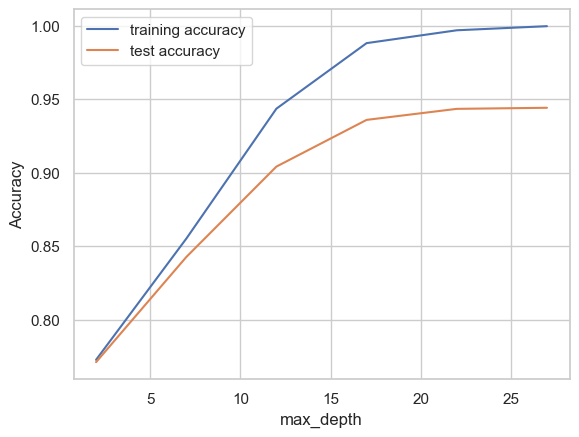

In [95]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [96]:
# Number of folds for k-fold CV
n_folds = 5

# params to build the model
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiating the model
rf = RandomForestClassifier(max_depth=6, class_weight ='balanced', random_state=100)


# fiting tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, verbose = 1,scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8320561404214605
{'n_estimators': 600}


In [97]:
# checking scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.634527,0.083261,0.112889,0.006248,100,{'n_estimators': 100},0.827452,0.828544,0.835577,0.834485,0.833252,0.831862,0.003258,3,0.840543,0.839907,0.838694,0.839209,0.840639,0.839798,0.000754
1,74.620312,0.249641,0.665121,0.008299,600,{'n_estimators': 600},0.827574,0.829514,0.835698,0.832545,0.834950,0.832056,0.003112,1,0.841331,0.840452,0.839634,0.838906,0.839517,0.839968,0.000841
2,147.044996,13.687479,1.394231,0.260427,1100,{'n_estimators': 1100},0.826967,0.829514,0.836304,0.832424,0.834950,0.832032,0.003433,2,0.841907,0.841331,0.839573,0.838452,0.839517,0.840156,0.001273


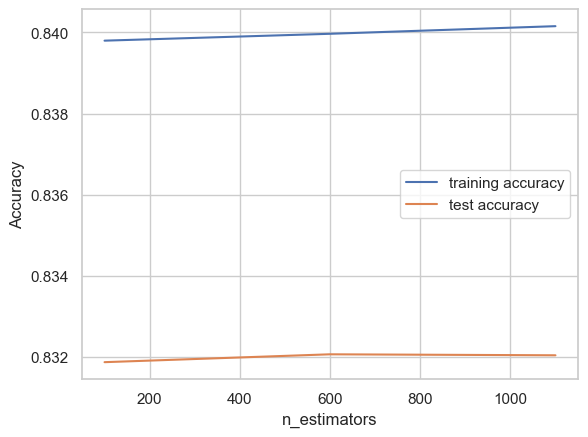

In [98]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [99]:
# number of folds for k-fold CV
n_folds = 5

# parameters to build the model
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=6,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds, 
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8356938856723005
{'max_features': 14}


In [100]:
# scores of CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.050262,0.127454,0.215134,0.011685,4,{'max_features': 4},0.827452,0.828544,0.835577,0.834485,0.833252,0.831862,0.003258,4,0.840543,0.839907,0.838694,0.839209,0.840639,0.839798,0.000754
1,41.733144,0.074086,0.224636,0.010874,8,{'max_features': 8},0.830363,0.832060,0.839457,0.835698,0.833738,0.834263,0.003142,3,0.846758,0.843059,0.842180,0.843666,0.840942,0.843321,0.001947
2,70.078451,1.568469,0.200763,0.037035,14,{'max_features': 14},0.830363,0.833030,0.841033,0.836668,0.837376,0.835694,0.003682,1,0.846667,0.844696,0.842696,0.844696,0.843701,0.844491,0.001317
3,61.291198,14.603561,0.108873,0.014155,20,{'max_features': 20},0.830484,0.835334,0.836789,0.834121,0.835193,0.834384,0.002127,2,0.847273,0.844787,0.841877,0.841938,0.841670,0.843509,0.002205
4,0.094539,0.009831,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


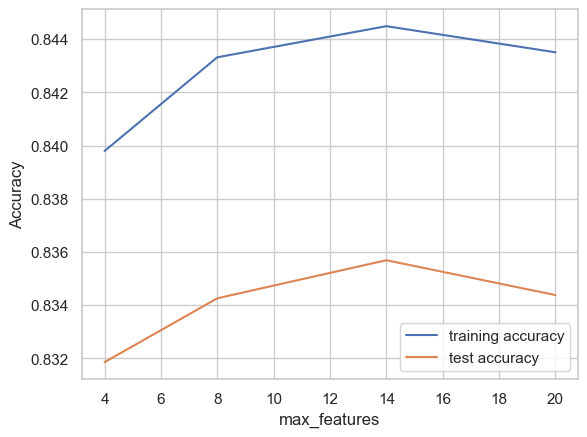

In [101]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [102]:
# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiating the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fitting tree into training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8456613847130292
{'min_samples_leaf': 100}


In [103]:
# scores of CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.406633,0.529748,0.147491,0.007706,100,{'min_samples_leaf': 100},0.841761,0.842731,0.847945,0.848672,0.847199,0.845661,0.002844,1,0.858065,0.855337,0.855064,0.856428,0.855644,0.856108,0.001080
1,16.060195,0.384095,0.144836,0.005691,150,{'min_samples_leaf': 150},0.826967,0.830726,0.837395,0.833273,0.837133,0.833099,0.003949,2,0.842787,0.841695,0.842211,0.841816,0.842306,0.842163,0.000387
2,14.614010,0.170952,0.133742,0.008632,200,{'min_samples_leaf': 200},0.820783,0.825391,0.832788,0.829393,0.827795,0.827230,0.004021,3,0.834723,0.834753,0.834844,0.836269,0.832363,0.834590,0.001256
3,13.889170,0.041284,0.134156,0.011105,250,{'min_samples_leaf': 250},0.817752,0.822723,0.827089,0.824178,0.827553,0.823859,0.003543,4,0.831297,0.830964,0.830297,0.829994,0.828604,0.830231,0.000936
4,13.362548,0.038984,0.131470,0.007564,300,{'min_samples_leaf': 300},0.814478,0.820177,0.825755,0.823451,0.824521,0.821676,0.004048,5,0.829296,0.827144,0.825234,0.828751,0.826361,0.827357,0.001500


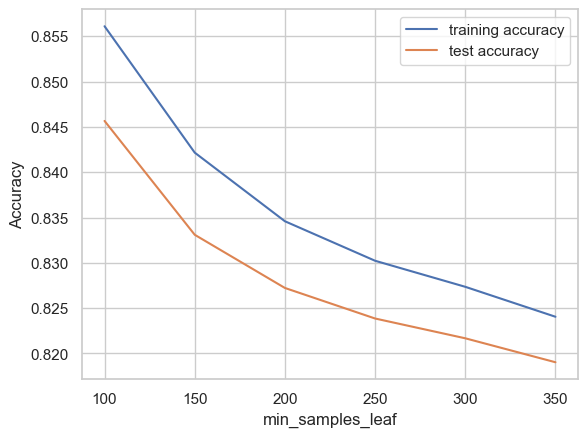

In [104]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [105]:
# number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiating the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fitting tree into training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds, 
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8589271292501545
{'min_samples_split': 200}


In [106]:
# scores of CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,20.216765,0.303274,0.169304,0.005027,200,{'min_samples_split': 200},0.850370,0.856796,0.864193,0.863102,0.860175,0.858927,0.004990,1,0.877194,0.878164,0.877164,0.876588,0.878683,0.877559,0.000757
1,19.446170,0.653994,0.174545,0.024356,250,{'min_samples_split': 250},0.844671,0.850612,0.856069,0.856554,0.854232,0.852428,0.004405,2,0.870646,0.868676,0.865583,0.866857,0.868922,0.868137,0.001753
2,20.510461,0.687468,0.171254,0.015924,300,{'min_samples_split': 300},0.840669,0.847096,0.853522,0.851582,0.850230,0.848620,0.004493,3,0.863734,0.862794,0.860672,0.862431,0.861131,0.862153,0.001116
3,18.345343,1.067631,0.150464,0.007555,350,{'min_samples_split': 350},0.834121,0.842367,0.849521,0.846247,0.848169,0.844085,0.005534,4,0.858368,0.856974,0.854731,0.857035,0.855766,0.856575,0.001236
4,17.610154,0.462729,0.140055,0.002074,400,{'min_samples_split': 400},0.836062,0.841397,0.848672,0.839821,0.843561,0.841902,0.004178,5,0.855337,0.853639,0.852487,0.852245,0.853371,0.853416,0.001093


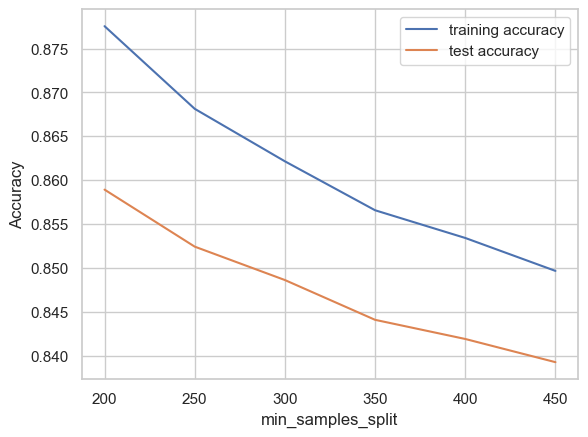

In [107]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [108]:
# Used randomizedSearchCV as above was taking lot time

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Creating the parameter grid based on the results
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 8, 10, None],  # Include None for no maximum depth
    'min_samples_split': [200, 500, 200],
    'min_samples_leaf': [100, 400, 200],
    'max_features': [5, 10]
}

# Instantiating the model
rf = RandomForestClassifier()

# Creating a RandomizedSearchCV object with specified parameters
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=70,  # You can adjust the number of iterations as needed
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 70 candidates, totalling 210 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 200, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': None}
Best Score: 0.9045934631325351


In [109]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=random_search.best_params_['max_depth'],
                             min_samples_split=random_search.best_params_['min_samples_split'],
                             max_features=random_search.best_params_['max_features'],
                             n_estimators =random_search.best_params_['n_estimators'],
                             random_state=100, oob_score=True)

In [110]:
# fitting the Model
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_features=10,
                       min_samples_split=200, n_estimators=300, oob_score=True,
                       random_state=100)

In [111]:
# predicting using test data

predictions = rfc.predict(X_test_pca)

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6903
           1       0.35      0.73      0.48       586

    accuracy                           0.87      7489
   macro avg       0.66      0.81      0.70      7489
weighted avg       0.93      0.87      0.89      7489



In [113]:
rfc.oob_score_

0.8692341271766019

In [114]:
#create confusion matrix
cm = metrics.confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)


confusoin matrix 	
 [[6109  794]
 [ 156  430]]


In [115]:
# Accuracy
print("Accuracy      ",round(metrics.accuracy_score(y_test, predictions),2))

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))


# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2)) 

Accuracy       0.87
sensitivity 	 0.73
specificity 	 0.88
AUC:    	 0.89


### 3 Decision Tree with PCA

In [116]:

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': range(50, 150, 50),
}

In [117]:
dt = DecisionTreeClassifier(random_state=42)

In [118]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "recall")

In [119]:
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [120]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.317369,0.021421,0.005664,0.006975,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.555421,0.658986,0.623666,0.565713,0.62503,0.605763,0.039148,41
1,0.329330,0.013731,0.007807,0.003366,2,5,100,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.555421,0.658986,0.623666,0.565713,0.62503,0.605763,0.039148,41
2,0.290832,0.013435,0.009083,0.006284,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.555421,0.658986,0.623666,0.565713,0.62503,0.605763,0.039148,41
3,0.310131,0.015914,0.006989,0.002354,2,10,100,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.555421,0.658986,0.623666,0.565713,0.62503,0.605763,0.039148,41
4,0.312253,0.005148,0.004756,0.004392,2,20,50,"{'max_depth': 2, 'min_samples_leaf': 20, 'min_...",0.555421,0.658986,0.623666,0.565713,0.62503,0.605763,0.039148,41


In [121]:
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8596783368263907
DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)


In [122]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=20, 
                                  min_samples_leaf=10,
                                  min_samples_split=50)

In [123]:
dt_best.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)

In [124]:
# Predictions on the train set
y_train_pred = dt_best.predict(X_train_pca)


# Creating Confusion matrix

confusion=metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[18535,  2082],
       [ 1843, 18774]], dtype=int64)

In [125]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_train, y_train_pred),2))

Accuracy:- 0.9
Sensitivity:- 0.91
Specificity:- 0.9
Recall:- 0.91
Area under curve is: 0.9


In [127]:
# Prediction on the test set
y_test_pred = dt_best.predict(X_test_pca)

In [128]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5822 1081]
 [ 202  384]]


In [129]:
# Accuracy
print("Accuracy:-   ",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-     " , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_test_pred),2))

Accuracy:-    0.83
Sensitivity:- 0.91
Specificity:- 0.9
Recall:-      0.91
Area under curve is: 0.75


### 4 Logistic Regression without PCA

In [130]:
# Selecting 15 Features with logistic regression model
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [131]:
#Checking which features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 132),
 ('std_og_t2o_mou', False, 131),
 ('loc_ic_t2o_mou', False, 130),
 ('arpu_6', False, 28),
 ('arpu_7', False, 103),
 ('arpu_8', False, 71),
 ('roam_ic_mou_6', False, 61),
 ('roam_ic_mou_7', False, 101),
 ('roam_ic_mou_8', False, 116),
 ('roam_og_mou_6', False, 63),
 ('roam_og_mou_7', False, 10),
 ('roam_og_mou_8', False, 25),
 ('loc_og_t2t_mou_6', False, 78),
 ('loc_og_t2t_mou_7', False, 35),
 ('loc_og_t2t_mou_8', False, 113),
 ('loc_og_t2m_mou_6', False, 82),
 ('loc_og_t2m_mou_7', False, 51),
 ('loc_og_t2m_mou_8', False, 72),
 ('loc_og_t2f_mou_6', False, 44),
 ('loc_og_t2f_mou_7', False, 21),
 ('loc_og_t2f_mou_8', False, 111),
 ('loc_og_t2c_mou_6', False, 23),
 ('loc_og_t2c_mou_7', False, 14),
 ('loc_og_t2c_mou_8', False, 18),
 ('loc_og_mou_6', False, 59),
 ('loc_og_mou_7', False, 119),
 ('loc_og_mou_8', False, 19),
 ('std_og_t2t_mou_6', False, 80),
 ('std_og_t2t_mou_7', False, 66),
 ('std_og_t2t_mou_8', False, 15),
 ('std_og_t2m_mou_6', False, 81),
 ('

In [132]:
# Puting all the columns into col which have been selected by RFE

col = X_train.columns[rfe.support_]


In [133]:
# Selecting only the columns selected by RFE

X_train = X_train[col]

X_train.columns

Index(['std_ic_t2f_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_data_8', 'count_rech_3g_7',
       'night_pck_user_6', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_7', 'sachet_3g_8', 'tenure_6-12M',
       'tenure_1-2Y'],
      dtype='object')

In [134]:
# Importing the statsmodel

import statsmodels.api as sm

In [135]:
# Instantiate the model and also Adding the constant to X_train

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

logm1.params


const                0.080078
std_ic_t2f_mou_8    -0.058598
total_rech_num_6     0.034283
total_rech_num_7     0.059337
total_rech_num_8    -0.197058
total_rech_data_8   -0.107861
count_rech_3g_7      0.417851
night_pck_user_6     0.278019
night_pck_user_8    -0.694984
monthly_2g_6        -0.988394
monthly_2g_7        -0.927860
monthly_2g_8        -1.754173
monthly_3g_7        -1.122709
sachet_3g_8         -0.711920
tenure_6-12M         0.822585
tenure_1-2Y          0.690329
dtype: float64

In [136]:
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                41234
Model:                            GLM   Df Residuals:                    41218
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19085.
Date:                Mon, 04 Dec 2023   Deviance:                       38170.
Time:                        23:45:53   Pearson chi2:                 2.31e+13
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3691
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0801      0.04

In [137]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_rech_num_7,6.23
1,total_rech_num_6,4.27
3,total_rech_num_8,3.69
7,night_pck_user_8,3.67
6,night_pck_user_6,2.65
5,count_rech_3g_7,2.41
4,total_rech_data_8,2.27
12,sachet_3g_8,2.20
10,monthly_2g_8,1.81
9,monthly_2g_7,1.78


In [139]:
# Droping night_pck_user_7 features as P value of this feature is high
X_train.drop('total_rech_num_7', axis = 1, inplace = True)

In [140]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
logm2.params

const                0.161958
std_ic_t2f_mou_8    -0.061382
total_rech_num_6     0.056185
total_rech_num_8    -0.159732
total_rech_data_8   -0.111159
count_rech_3g_7      0.493977
night_pck_user_6     0.214872
night_pck_user_8    -0.682232
monthly_2g_6        -1.030915
monthly_2g_7        -0.893826
monthly_2g_8        -1.772414
monthly_3g_7        -1.192278
sachet_3g_8         -0.791329
tenure_6-12M         0.840975
tenure_1-2Y          0.705533
dtype: float64

In [141]:
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41234
Model:                            GLM   Df Residuals:                    41219
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19353.
Date:                Mon, 04 Dec 2023   Deviance:                       38706.
Time:                        23:45:55   Pearson chi2:                 9.72e+11
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3608
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1620      0.046      3.520      0.000       0.072       0.252
std_ic_t2f_mou_8     -0.0614      0.004    -15.555      0.000      -0.069      -0.054
total_rech_num_6      0.0562      0.002     29.671      0.000       0.052       0.060
total_rech_num_8     -0.1597      0.003    -59.829      0.000      -0.165      -0.154
total_rech_data_8    -0.1112      0.012     -9.031      0.000      -0.135      -0.087
count_rech_3g_7       0.4940      0.025     20.107      0.000       0.446       0.542
night_pck_user_6      0.2149      0.031      6.921      0.000       0.154       0.276
night_pck_user_8     -0.6822      0.042    -16.090      0.000      -0.765      -0.599
monthly_2g_6         -1.0309      0.056    -18.268      0.000      -1.142      -0.920
monthly_2g_7         -0.8938      0.058    -15.345      0.000      -1.008      -0.780
monthly_2g_8         -1.7724      0.105    -16.856      0.000      -1.979      -1.566
monthly_3g_7         -1.1923      0.041    -29.026      0.000      -1.273      -1.112
sachet_3g_8          -0.7913      0.052    -15.364      0.000      -0.892      -0.690
tenure_6-12M          0.8410      0.037     22.989      0.000       0.769       0.913
tenure_1-2Y           0.7055      0.032     22.231      0.000       0.643       0.768
=====================================================================================
"""

In [142]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,night_pck_user_8,3.66
1,total_rech_num_6,3.12
5,night_pck_user_6,2.61
2,total_rech_num_8,2.52
4,count_rech_3g_7,2.33
3,total_rech_data_8,2.27
11,sachet_3g_8,2.18
9,monthly_2g_8,1.81
8,monthly_2g_7,1.78
7,monthly_2g_6,1.70


In [143]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = logm2.predict(sm.add_constant(X_train))
y_train_pred[:19]

0     0.003300
1     0.112827
2     0.463334
3     0.171173
4     0.716972
5     0.902798
6     0.135778
7     0.144644
8     0.000002
9     0.486533
10    0.127589
11    0.377735
12    0.831303
13    0.689167
14    0.279908
15    0.090035
16    0.649653
17    0.125988
18    0.315069
dtype: float64

In [144]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:12]

array([3.29992834e-03, 1.12827066e-01, 4.63333604e-01, 1.71172968e-01,
       7.16971583e-01, 9.02798427e-01, 1.35778418e-01, 1.44644413e-01,
       2.39391943e-06, 4.86533272e-01, 1.27588887e-01, 3.77734709e-01])

In [145]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,churn,Churn_Prob
0,0,0.003300
1,0,0.112827
2,0,0.463334
3,0,0.171173
4,0,0.716972


In [146]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,churn,Churn_Prob,Predicted
0,0,0.003300,0
1,0,0.112827,0
2,0,0.463334,0
3,0,0.171173,0
4,0,0.716972,1


#### Model Evaluation

In [147]:
# Importing Libraries

from sklearn import metrics

In [148]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.Predicted )
print(confusion)

[[15198  5419]
 [ 3726 16891]]


In [149]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.Predicted))

0.7782170053839065


In [150]:
# Evaluateing the other metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [151]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.Predicted))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# positive predictive value 

print (TP / float(TP+FP))
# Negative predictive value

print (TN / float(TN+ FN))

0.7782170053839065
Sensitivity:- 0.82
Specificity:- 0.74
0.7571044374719856
0.8031071655041218


#### Plotting the ROC Curve

In [152]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [153]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

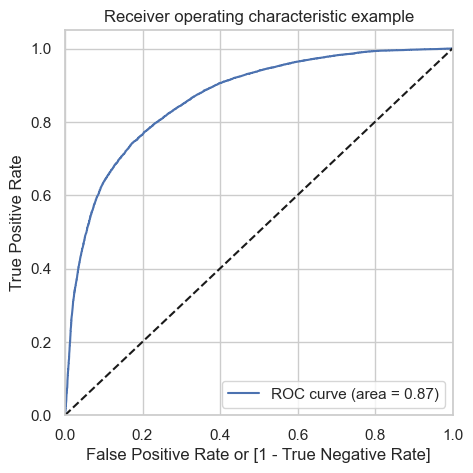

In [154]:
# Call the ROC function

draw_roc(y_train_pred_final.churn, y_train_pred_final.Churn_Prob)

#### The area under the ROC curve is 0.87 which is indicating that we have a good model.finding the optimal cutoff point.

In [155]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003300,0,1,0,0,0,0,0,0,0,0,0
1,0,0.112827,0,1,1,0,0,0,0,0,0,0,0
2,0,0.463334,0,1,1,1,1,1,0,0,0,0,0
3,0,0.171173,0,1,1,0,0,0,0,0,0,0,0
4,0,0.716972,1,1,1,1,1,1,1,1,1,0,0


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.643813  0.980308  0.307319
0.2   0.2  0.696901  0.954455  0.439346
0.3   0.3  0.735752  0.924092  0.547412
0.4   0.4  0.763811  0.880584  0.647039
0.5   0.5  0.778217  0.819275  0.737159
0.6   0.6  0.783261  0.734103  0.832420
0.7   0.7  0.759470  0.606538  0.912402
0.8   0.8  0.686400  0.408740  0.964059
0.9   0.9  0.563467  0.135907  0.991027


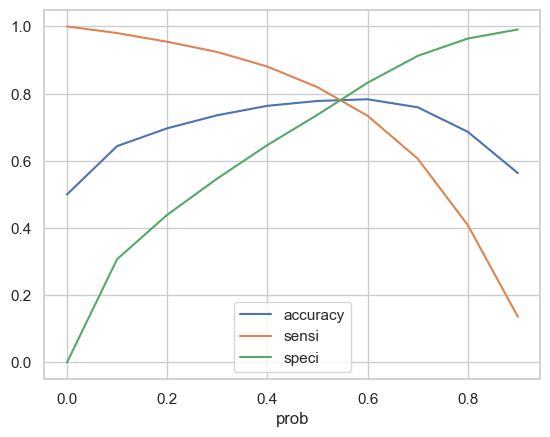

In [157]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [158]:
#From the curve above, 0.55 is the optimum point to take it as a cutoff probability. So let's choose 0.55 as our cutoff now.

In [159]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.003300,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.112827,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.463334,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.171173,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.716972,1,1,1,1,1,1,1,1,1,0,0,1


In [160]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.7825580831352767

In [161]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[16189,  4428],
       [ 4538, 16079]], dtype=int64)

In [162]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [163]:
# Calculate Sensitivity

TP/(TP+FN)

0.7798903817238202

In [164]:
# Calculate Specificity

TN/(TN+FP)

0.7852257845467333

In [165]:
# Precision-Recall View
# Let's now also build the training model using the precision-recall view

In [166]:
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.Predicted )
confusion

array([[15198,  5419],
       [ 3726, 16891]], dtype=int64)

In [167]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7571044374719856

In [168]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8192753552893244

In [169]:
from sklearn.metrics import precision_recall_curve

In [170]:
y_train_pred_final.churn, y_train_pred_final.Predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 41229    1
 41230    1
 41231    1
 41232    1
 41233    1
 Name: churn, Length: 41234, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        1
         ..
 41229    1
 41230    1
 41231    1
 41232    1
 41233    1
 Name: Predicted, Length: 41234, dtype: int64)

In [171]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.Churn_Prob)

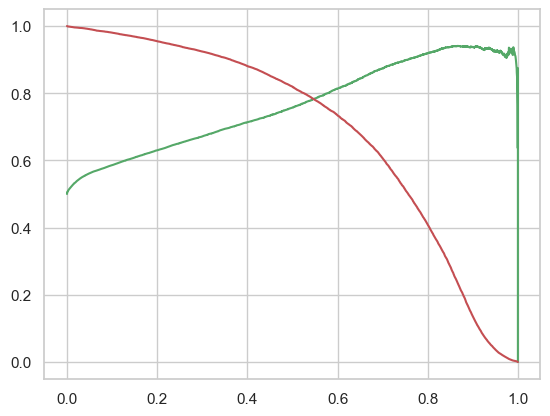

In [172]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [173]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.003300,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.112827,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.463334,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.171173,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.716972,1,1,1,1,1,1,1,1,1,0,0,1


In [174]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.7825580831352767

In [175]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[16189,  4428],
       [ 4538, 16079]], dtype=int64)

In [176]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
# Calculate Precision

TP/(TP+FP)

0.7840737309211488

In [178]:
# Calculate Recall

TP/(TP+FN)

0.7798903817238202

In [179]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7489 entries, 48388 to 77921
Columns: 146 entries, loc_og_t2o_mou to tenure_5Y+
dtypes: float64(128), int64(18)
memory usage: 8.4 MB


### This cutoff point seems good to go!
### Prediction on the test data


In [180]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,std_ic_t2f_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_data_8,count_rech_3g_7,night_pck_user_6,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_7,sachet_3g_8,tenure_6-12M,tenure_1-2Y
48388,0.00,11,10,12,0.0,0.0,-1.0,-1.0,0,0,0,0,0,1.0,0.0
29754,0.00,8,5,7,1.0,0.0,0.0,0.0,1,1,0,0,0,0.0,0.0
50131,2.46,28,16,21,6.0,0.0,0.0,0.0,0,0,0,0,0,0.0,1.0
66630,0.98,26,17,16,1.0,0.0,-1.0,0.0,0,0,0,0,0,0.0,1.0
91920,0.00,13,15,8,0.0,0.0,-1.0,-1.0,0,0,0,0,0,0.0,0.0


In [181]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,std_ic_t2f_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_data_8,count_rech_3g_7,night_pck_user_6,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_7,sachet_3g_8,tenure_6-12M,tenure_1-2Y
48388,1.0,0.00,11,10,12,0.0,0.0,-1.0,-1.0,0,0,0,0,0,1.0,0.0
29754,1.0,0.00,8,5,7,1.0,0.0,0.0,0.0,1,1,0,0,0,0.0,0.0
50131,1.0,2.46,28,16,21,6.0,0.0,0.0,0.0,0,0,0,0,0,0.0,1.0
66630,1.0,0.98,26,17,16,1.0,0.0,-1.0,0.0,0,0,0,0,0,0.0,1.0
91920,1.0,0.00,13,15,8,0.0,0.0,-1.0,-1.0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19560,1.0,0.00,12,12,5,0.0,1.0,0.0,-1.0,0,1,0,1,0,0.0,0.0
96533,1.0,67.76,3,3,1,0.0,0.0,-1.0,-1.0,0,0,0,0,0,0.0,1.0
30496,1.0,14.86,6,8,6,1.0,0.0,0.0,0.0,0,0,0,0,0,1.0,0.0
4030,1.0,0.00,16,11,9,0.0,1.0,0.0,-1.0,0,0,0,0,0,1.0,0.0


In [182]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7489 entries, 48388 to 77921
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   std_ic_t2f_mou_8   7489 non-null   float64
 1   total_rech_num_6   7489 non-null   int64  
 2   total_rech_num_7   7489 non-null   int64  
 3   total_rech_num_8   7489 non-null   int64  
 4   total_rech_data_8  7489 non-null   float64
 5   count_rech_3g_7    7489 non-null   float64
 6   night_pck_user_6   7489 non-null   float64
 7   night_pck_user_8   7489 non-null   float64
 8   monthly_2g_6       7489 non-null   int64  
 9   monthly_2g_7       7489 non-null   int64  
 10  monthly_2g_8       7489 non-null   int64  
 11  monthly_3g_7       7489 non-null   int64  
 12  sachet_3g_8        7489 non-null   int64  
 13  tenure_6-12M       7489 non-null   float64
 14  tenure_1-2Y        7489 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 936.1 KB


In [183]:
# Drop the required columns from X_test as well

X_test.drop(['total_rech_num_7'], 1, inplace = True)

In [184]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = logm2.predict(sm.add_constant(X_test))
y_test_pred[:19]

48388    0.542783
29754    0.072926
50131    0.150378
66630    0.351242
91920    0.520457
57023    0.098069
3388     0.164141
48874    0.000914
34480    0.011908
63686    0.148638
65754    0.683468
54763    0.499678
88894    0.362189
48107    0.632607
80666    0.475195
18343    0.305441
62865    0.983787
15111    0.746569
10366    0.012626
dtype: float64

In [185]:
# Reshaping it into an array

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:12]

array([0.54278285, 0.07292647, 0.15037818, 0.35124218, 0.52045678,
       0.0980695 , 0.16414088, 0.00091358, 0.01190828, 0.14863821,
       0.68346839, 0.49967753])

In [186]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [187]:
# Let's see the head

y_pred_1.head()

,0
0,0.542783
1,0.072926
2,0.150378
3,0.351242
4,0.520457


In [188]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [189]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [190]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,churn,0
0,0,0.542783
1,0,0.072926
2,0,0.150378
3,0,0.351242
4,0,0.520457


In [191]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Churn_Prob'})
y_pred_final.head()

,churn,Churn_Prob
0,0,0.542783
1,0,0.072926
2,0,0.150378
3,0,0.351242
4,0,0.520457


In [192]:
# Make predictions on the test set using 0.55 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_pred_final.head()

,churn,Churn_Prob,final_predicted
0,0,0.542783,0
1,0,0.072926,0
2,0,0.150378,0
3,0,0.351242,0
4,0,0.520457,0


In [193]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['churn'], y_pred_final.final_predicted)

0.7898250767792763

In [194]:
confusion2 = metrics.confusion_matrix(y_pred_final['churn'], y_pred_final.final_predicted )
confusion2

array([[5510, 1393],
       [ 181,  405]], dtype=int64)

In [195]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [196]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6911262798634812

In [197]:
# Let us calculate specificity
TN / float(TN+FP)

0.7982036795596118

In [198]:
# Recall

TP/float(TP+FN)

0.6911262798634812

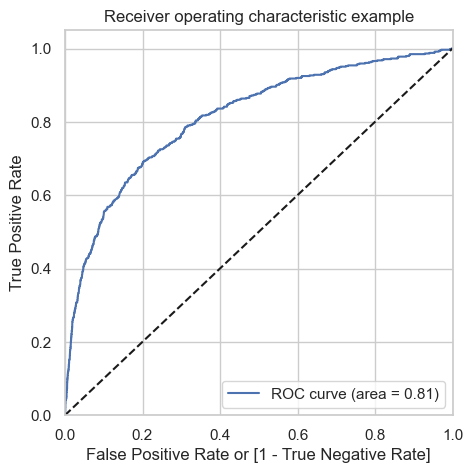

In [199]:
#  ROC function

draw_roc(y_pred_final.churn, y_pred_final.Churn_Prob)

In [200]:
# features and their coefficicent from final model
parameters=logm2.params.sort_values(ascending=False)
parameters

tenure_6-12M         0.840975
tenure_1-2Y          0.705533
count_rech_3g_7      0.493977
night_pck_user_6     0.214872
const                0.161958
total_rech_num_6     0.056185
std_ic_t2f_mou_8    -0.061382
total_rech_data_8   -0.111159
total_rech_num_8    -0.159732
night_pck_user_8    -0.682232
sachet_3g_8         -0.791329
monthly_2g_7        -0.893826
monthly_2g_6        -1.030915
monthly_3g_7        -1.192278
monthly_2g_8        -1.772414
dtype: float64

### Creating All Model Summary table

In [203]:
model_summary = pd.DataFrame(
    {'Model':['Logistic regression with PCA','Random forest with PCA','Decision Tree with PCA','Logistic Regression without PCA'],
                      
    'Recall':       [0.84,0.73,0.91,0.69],
    'Accuracy':     [0.80,0.87,0.83,0.78],
    'AUC_score':[0.88,0.89,0.75,0.81],
    })

model_summary.sort_values(by=['Recall','Accuracy','AUC_score'],ascending=False)

,Model,Recall,Accuracy,AUC_score
2,Decision Tree with PCA,0.91,0.83,0.75
0,Logistic regression with PCA,0.84,0.80,0.88
1,Random forest with PCA,0.73,0.87,0.89
3,Logistic Regression without PCA,0.69,0.78,0.81


### Finding important features from the decision tree

In [202]:
# finding important features from the decision tree

features = dt_best.feature_importances_
cols =[X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-30:]].columns]
                
cols

[Index(['loc_og_t2m_mou_6', 'loc_og_t2t_mou_7', 'roam_ic_mou_8',
        'loc_og_t2f_mou_7', 'roam_og_mou_8', 'loc_og_t2f_mou_8',
        'roam_og_mou_7', 'loc_og_t2m_mou_7', 'arpu_6', 'loc_og_t2o_mou',
        'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'arpu_7', 'loc_og_t2f_mou_6',
        'roam_ic_mou_7', 'loc_og_t2t_mou_6', 'arpu_8', 'roam_ic_mou_6',
        'roam_og_mou_6', 'std_og_t2o_mou', 'loc_ic_t2o_mou'],
       dtype='object')]


## Output :-

#### As per problem statement we have build the model and identify the most significant features that help in reduce churn
##### These are the some important features:- 
        'loc_og_t2m_mou_6', 'loc_og_t2t_mou_7', 'roam_ic_mou_8',
        'loc_og_t2f_mou_7', 'roam_og_mou_8', 'loc_og_t2f_mou_8',
        'roam_og_mou_7', 'loc_og_t2m_mou_7', 'arpu_6', 'loc_og_t2o_mou',
        'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'arpu_7', 'loc_og_t2f_mou_6',
        'roam_ic_mou_7', 'loc_og_t2t_mou_6', 'arpu_8', 'roam_ic_mou_6',
        'roam_og_mou_6', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
    
### All model	Test  Recall,	Accuracy,	AUC_score

        Decision Tree with PCA          0.91	0.83	0.75
        Logistic regression with PCA	0.84	0.80	0.88
        Random forest with PCA	        0.73	0.87	0.89
        Logistic Regression without PCA	0.69	0.78	0.81

## Observations and recommend strategies:- 
        1. Company should focus on the roaming rates. They should providing offers for roaming user to stop churn rate.
        2. Most of the churn has happend for outgoing call customer hence they should tariffs plans less to other operators
        3. Company should target the customers whose incoming calls are less in 8th month and check for reason with customer to reduce churn.
        4. Company should target the customers whose 3g, 2g recharge are less in 8th month and check for reason with customer to reduce churn.
        5. Company should analyse the customer complaint for the service related issues to reduce churn rate
        6. Company should focus if found in dicrease in ARPU as this might be churn case and should check for reason with customer to reduce churn
        7. Less vintage customer is high churn rate compare to non churn as they are comparing rate with other operators and switching frequently. Company should check for offer for the new customer for the 6 to 12 month to reduce churn rate.
        8. Company should give attractive offers to new customers to reduce less vintage customer